# 3. Základné operácie s obrazmi

In [1]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
from scipy import signal
from skimage.color import rgb2gray
from skimage import io, data, transform

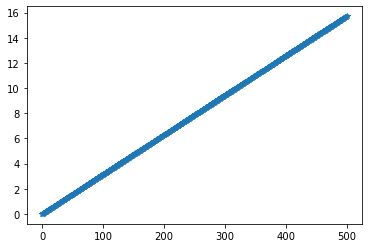

In [2]:
x = np.linspace(0, 5*np.pi, 500)
plt.plot(x, "-*")

Text(0.5, 1.0, 'Cartesian system of vector values')

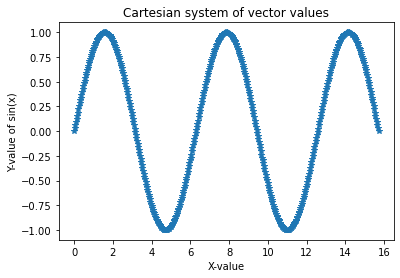

In [3]:
plt.figure()
y=np.sin(x)
plt.plot(x, y, "*-")
plt.ylabel('Y-value of sin(x)')
plt.xlabel('X-value')
plt.title('Cartesian system of vector values')

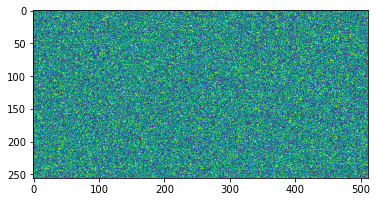

In [4]:
plt.figure()
rand_img = np.random.rand(256, 512)
plt.imshow(rand_img)

Obrázok astronautky je zložený z troch farebných kanálov: červeného (Red), zeleného
(Green) a modrého (Blue), je nazývaný kompozitný, RGB alebo „truecolor“. Jednotlivé kanály
predstavujú jednotlivé 512x512 rozmerné vrstvy trojrozmernej matice.

Text(0.5, 1.0, 'Astronaut in RGB')

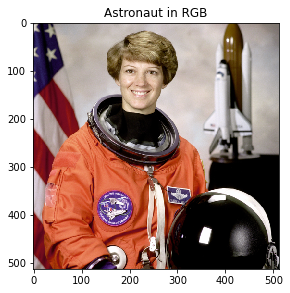

In [5]:
image = data.astronaut()
fig, ax = plt.subplots()
io.imshow(image)
plt.title('Astronaut in RGB')

Takto môžeme zobraziť jednotlivé kanály obrázku, potlačiť ostatné kanály a ponechať
len červený alebo zobraziť šedotónový obrázok.

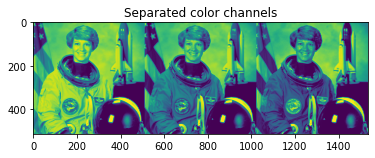

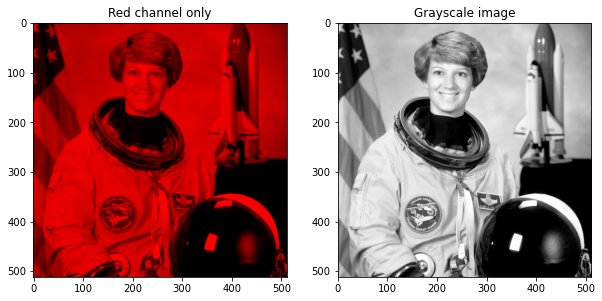

In [6]:
plt.figure()
plt.title('Separated color channels')
plt.imshow(np.concatenate((image[:, :, 0], image[:, :, 1], image[:, :, 2]), 1))

plt.figure(figsize= (10, 10))
plt.subplot(121)
plt.title('Red channel only')
imageR = np.array(image)
imageR[:, :, 1:] = 0
plt.imshow(imageR)

plt.subplot(122)
plt.title('Grayscale image')
img = imageR[:, :, 0].astype(dtype = np.uint8)
plt.imshow(img, cmap= 'gray')

Pomer strán obrázku je možné zmeniť príkazom *axis.set_aspect*. Jedná sa o nastavenie mierky
osi, t.j. pomer y ku x.

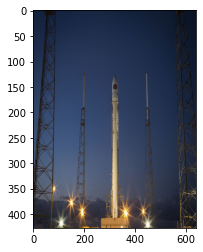

In [7]:
rocket = data.rocket()
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(rocket)
ax.set_aspect(2)

Previesť RGB obrázok na šedotónový nie je zložité. Jeden z možných postupov je uvedený nižšie.
Všimnite si, že jednotlivé farebné kanály neprispievajú do výsledku rovnako, lebo oko nie je
na jednotlivé farebné zložky rovnako citlivé. Jednoduchým spriemerovaním by sme dostali
nevýrazný obrázok. Môžete si tiež všimnúť, že výsledok nie je identický s výsledkom funkcie
_rgb2gray_. *rgb2gray* používa mierne odlišnú sadu konštánt (0.2989*R + 0.5870*G + 0.1140*B).

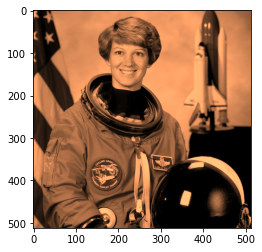

In [8]:
iGray = 0.2126 * image[:,:,0] + 0.7152 * image[:,:,1] + 0.0722 * image[:,:,2]
iGray = iGray.astype(dtype=np.uint8)
plt.figure()
plt.imshow(iGray, cmap='copper')

Môžeme porovnať náš výpočet s funkciou *rgb2gray* a zistiť na koľko sa od seba jednotlivé
metódy líšia. Odčítaním výsledných obrázkov si môžeme zobraziť rozdiely výpočtov.

Sum error between methods:  1012
Avg error:  0.0038604736328125


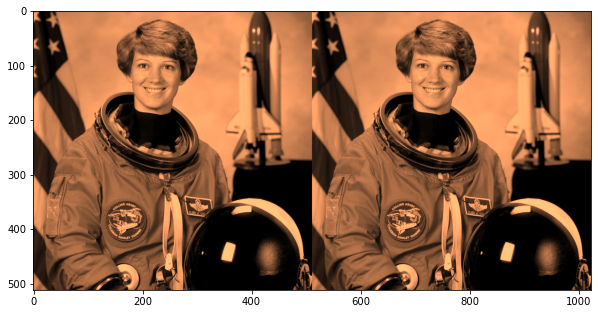

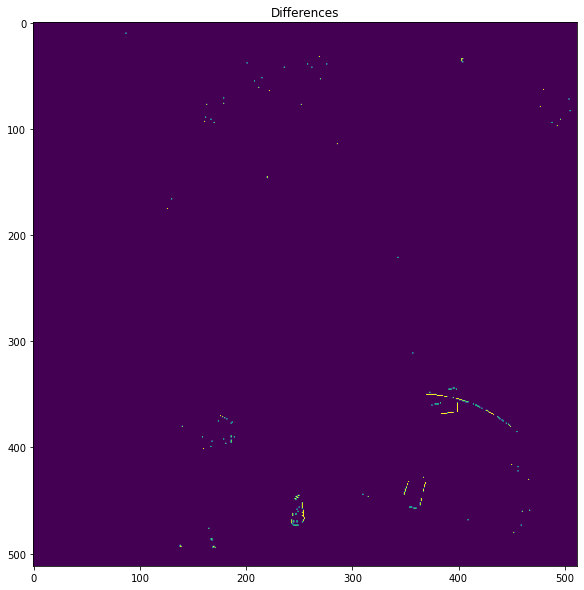

In [9]:
iGray2 = (rgb2gray(image) * 255).astype(dtype=np.uint8)
print("Sum error between methods: ", np.sum((iGray2 - iGray) ** 2))
print("Avg error: ", np.sum((iGray2 - iGray)**2 / iGray2.size))

plt.figure(figsize= (10, 10))
plt.imshow(np.concatenate((iGray, iGray2), 1), cmap='copper')

plt.figure(figsize= (10, 10))
plt.title('Differences')
plt.imshow(iGray - iGray2)

Obrázky možno otáčať a meniť ich veľkosť. Keďže sú to tiež matice, je možne s nimi prevádzať
matematické operácie, ako napríklad umocniť všetky pixely.

Sum error between methods:  359.5713177302601
Avg error:  0.00011430464354523347


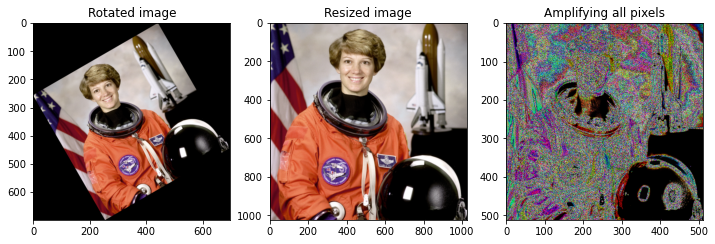

In [10]:
iRotated = transform.rotate(image, 30, resize='True')
plt.figure(figsize= (12, 12))
plt.subplot(131)
plt.title('Rotated image')
plt.imshow(iRotated)

iResized = transform.resize(image, np.array(iGray.shape) * 2, order= 1)
iResized2 = transform.resize(image, np.array(iGray.shape) * 2, order= 4)
print("Sum error between methods: ", np.sum((iResized2 - iResized)**2))
print("Avg error: ", np.sum((iResized2 - iResized)**2 / iResized2.size))

plt.subplot(132)
plt.title('Resized image')
plt.imshow(iResized)

plt.subplot(133)
plt.title('Amplifying all pixels')
plt.imshow(image**2)

Konvolúcia so zachovaním pôvodnej veľkosti obrázka.

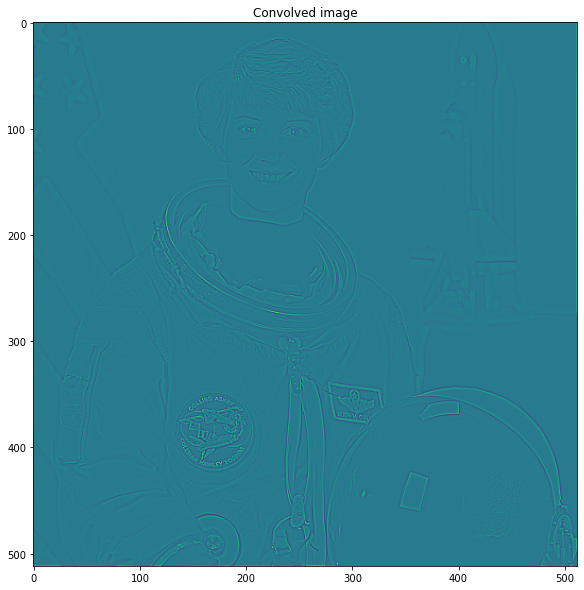

In [11]:
plt.figure(figsize= (10, 10))
g = np.array(np.array([[1, 2, 1]]) * np.array([[1], [2], [1]]) / 16)
plt.imshow(signal.convolve2d(rgb2gray(image), g))
convolvedImg = signal.convolve2d(rgb2gray(image),g, 'same')
plt.title('Convolved image')
plt.imshow(rgb2gray(image) - convolvedImg)

### Úloha
Napíšte vlastný program, ktorý načíta obrázok, rozdelí ho pomyselnou mriežkou vami
definovaných rozmerov a jednotlivé výrezy obrázku náhodne poprehadzuje. Zobrazte výsledok.